In [1]:
import pandas as pd
import numpy as np
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from datetime import date
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df = pd.read_csv("data/data_train.csv")
df_new_opti = pd.read_csv("data/opti_Maruipe.csv")
df_new_prev = pd.read_csv("data/pred_Maruipe.csv")
df_new = df_new_prev.append(df_new_opti).iloc[:,1:]
df_new_week = pd.read_csv("data/df_new_week.csv")

df = df.drop(columns=['ScheduledTime', 'AppointmentTime', 'Neighbourhood'])
df_new = df_new[list(df.columns)]
df_new_week = df_new_week[list(df.columns)]
#df_new = df_new.drop(columns=['ScheduledTime', 'AppointmentTime'])

In [3]:
X = df.loc[:, df.columns != 'NoShow']
y = df.NoShow

In [4]:
X

,PatientId,AppointmentID,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,...,SANTOS REIS,SEGURANÇA DO LAR,SOLON BORGES,SÃO BENEDITO,SÃO CRISTÓVÃO,SÃO JOSÉ,SÃO PEDRO,TABUAZEIRO,UNIVERSITÁRIO,VILA RUBIM
0,30845,29332,0,62,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,55325,29079,1,56,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,15722,29115,0,62,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9018,29299,0,8,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,23941,29073,0,56,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75278,41805,8362,1,64,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75279,57745,10092,0,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75280,57745,10095,0,29,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75281,23294,11966,1,48,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = df['NoShow'])

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model = LogisticRegression()

# Fit the model to our data
model.fit(X, y)

LogisticRegression()

Train AUC: 0.661
Test AUC: 0.666


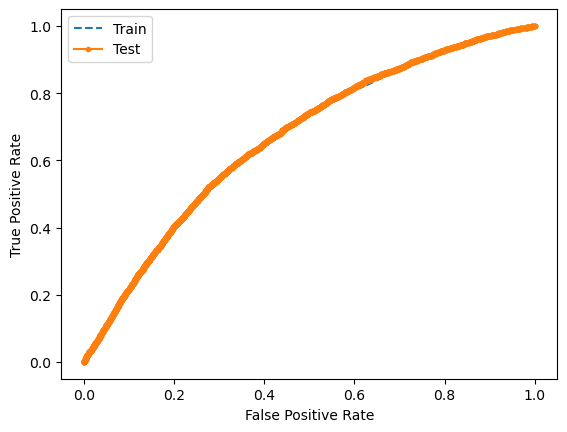

In [7]:
train_pred = model.predict_proba(X_train)[:,1]
test_pred = model.predict_proba(X_test)[:,1]

print("Train AUC: %.3f" % metrics.roc_auc_score(y_train, train_pred))
print("Test AUC: %.3f" % metrics.roc_auc_score(y_test, test_pred))

train_fpr, train_tpr, _ = metrics.roc_curve(y_train, train_pred)
test_fpr, test_tpr, _ = metrics.roc_curve(y_test, test_pred)

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, linestyle='--', label='Train')
plt.plot(test_fpr, test_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [8]:
X_new = df_new.loc[:, df_new.columns != 'NoShow']
new_pred = model.predict_proba(X_new)[:,1]

In [9]:
pd.DataFrame(new_pred).to_csv("data/pred_lr.csv", index = False)

In [10]:
X_SMS = df_new.loc[:, df_new.columns != 'NoShow']
X_SMS.SMS_received = [0]*len(X_SMS)
pred_SMS = model.predict_proba(X_SMS)[:,1]
X_noSMS = df_new.loc[:, df_new.columns != 'NoShow']
X_noSMS.SMS_received = [1]*len(X_noSMS)
pred_noSMS = model.predict_proba(X_noSMS)[:,1]

C:\Users\Charlotte\.julia\conda\3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Charlotte\.julia\conda\3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [11]:
pd.DataFrame(np.column_stack((pred_SMS, pred_noSMS))).to_csv("data/pred_lr_sms.csv", index= False)

In [12]:
X_new_week = df_new_week.loc[:, df_new_week.columns != 'NoShow']
new_pred_week = model.predict_proba(X_new_week)[:,1]
pd.DataFrame(new_pred_week).to_csv("data/pred_lr_week.csv", index = False)

### XGBoost

In [13]:
#create xgboost classification obj
xgboost_clf2 = GradientBoostingClassifier(random_state=0)

#training via xgboost classficiation model
xgboost_clf2.fit(X_train, y_train)

#make prediction using the test set
y_pred= xgboost_clf2.predict(X_test)

Train AUC: 0.531
Test AUC: 0.527


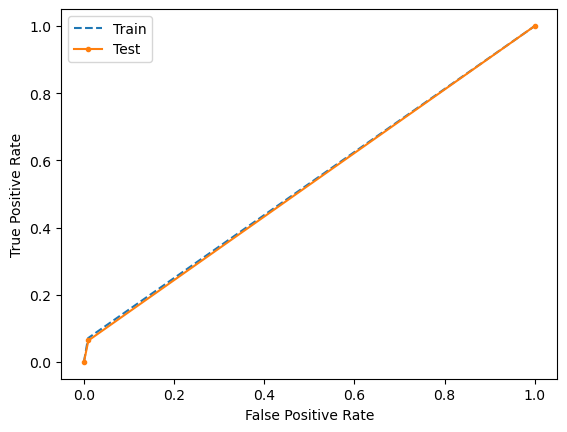

In [14]:
train_pred = xgboost_clf2.predict(X_train)
test_pred = xgboost_clf2.predict(X_test)

print("Train AUC: %.3f" % metrics.roc_auc_score(y_train, train_pred))
print("Test AUC: %.3f" % metrics.roc_auc_score(y_test, test_pred))

train_fpr, train_tpr, _ = metrics.roc_curve(y_train, train_pred)
test_fpr, test_tpr, _ = metrics.roc_curve(y_test, test_pred)

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, linestyle='--', label='Train')
plt.plot(test_fpr, test_tpr, marker='.', label='Test')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()